# Data Project - Stock Market Analysis 

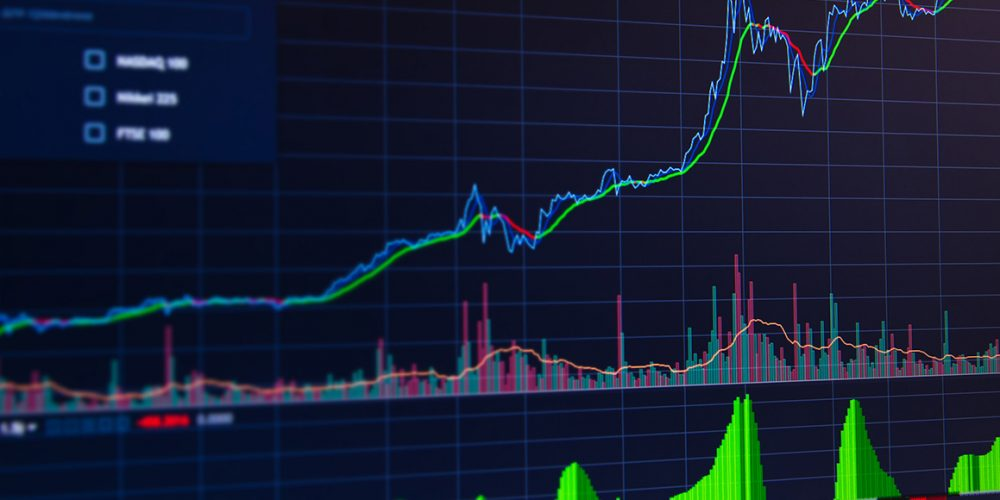

In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [4]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name

In [5]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2021-11-08,3579.000000,3487.860107,3523.239990,3488.979980,3074000.0,3488.979980,AMAZON
2021-11-09,3593.770020,3501.429932,3515.250000,3576.229980,4294900.0,3576.229980,AMAZON
2021-11-10,3605.449951,3463.090088,3563.870117,3482.050049,4027400.0,3482.050049,AMAZON
2021-11-11,3543.239990,3467.469971,3513.000000,3472.500000,2264400.0,3472.500000,AMAZON
2021-11-12,3540.729980,3447.050049,3485.000000,3525.149902,2688500.0,3525.149902,AMAZON
2021-11-15,3593.879883,3525.810059,3537.000000,3545.679932,2929700.0,3545.679932,AMAZON
2021-11-16,3576.500000,3525.149902,3539.000000,3540.699951,2217100.0,3540.699951,AMAZON
2021-11-17,3587.250000,3545.350098,3564.719971,3549.000000,2560300.0,3549.000000,AMAZON
2021-11-18,3704.199951,3561.000000,3566.350098,3696.060059,5703500.0,3696.060059,AMAZON


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2020-11-23 to 2021-11-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          1004 non-null   float64
 1   Low           1004 non-null   float64
 2   Open          1004 non-null   float64
 3   Close         1004 non-null   float64
 4   Volume        1004 non-null   float64
 5   Adj Close     1004 non-null   float64
 6   company_name  1004 non-null   object 
dtypes: float64(6), object(1)
memory usage: 62.8+ KB


In [7]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03,1004.000000
mean,1539.106823,1510.841782,1524.587873,1525.342080,3.014335e+07,1524.928423
std,1397.214859,1371.329451,1384.135358,1384.367320,3.890688e+07,1384.758517
min,115.849998,112.589996,113.910004,113.849998,3.468000e+05,113.152435
25%,199.472496,195.252502,196.604996,197.720001,2.146100e+06,196.410076
50%,1041.252518,1020.600006,1022.635010,1033.304993,1.025385e+07,1033.304993
75%,3033.399963,2974.780029,3006.750000,2994.444946,4.859950e+07,2994.444946
max,3773.080078,3696.790039,3744.000000,3731.409912,1.925415e+08,3731.409912


In [8]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,137.247012,134.524661,135.867650,135.958247,9.003791e+07,135.497067
std,10.652680,10.710303,10.637591,10.743968,2.886579e+07,10.895421
min,115.849998,112.589996,113.910004,113.849998,4.100000e+07,113.152435
25%,127.924999,125.625000,126.579998,126.794998,6.951455e+07,126.363487
50%,135.410004,133.279999,134.350006,134.160004,8.558920e+07,133.584595
75%,147.285004,145.410004,146.120003,146.144997,1.050349e+08,145.902054
max,161.020004,156.529999,157.649994,160.550003,1.925415e+08,160.550003


In [9]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-11-23 to 2021-11-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          251 non-null    float64
 1   Low           251 non-null    float64
 2   Open          251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    float64
 5   Adj Close     251 non-null    float64
 6   company_name  251 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.7+ KB


In [10]:
type(company)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Date'>

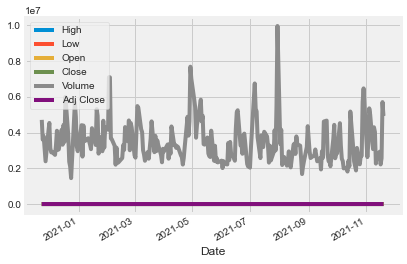

In [11]:
company.plot()

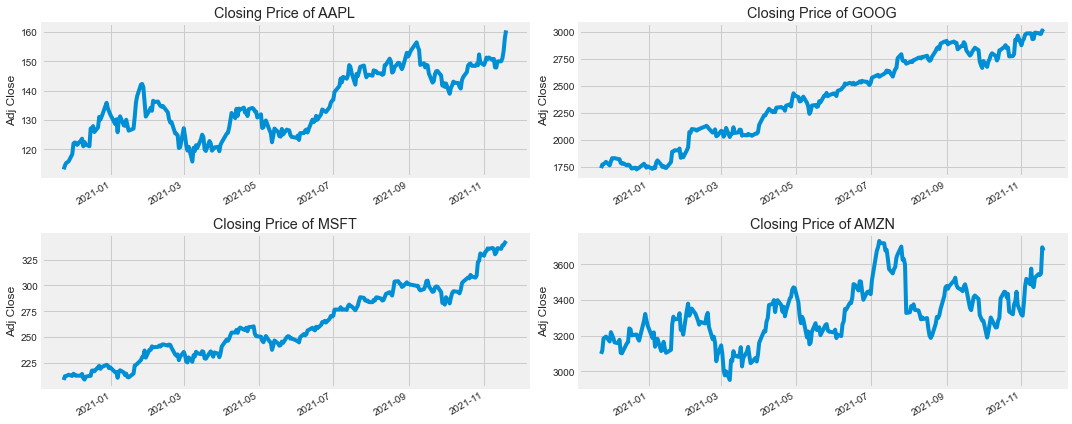

In [12]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

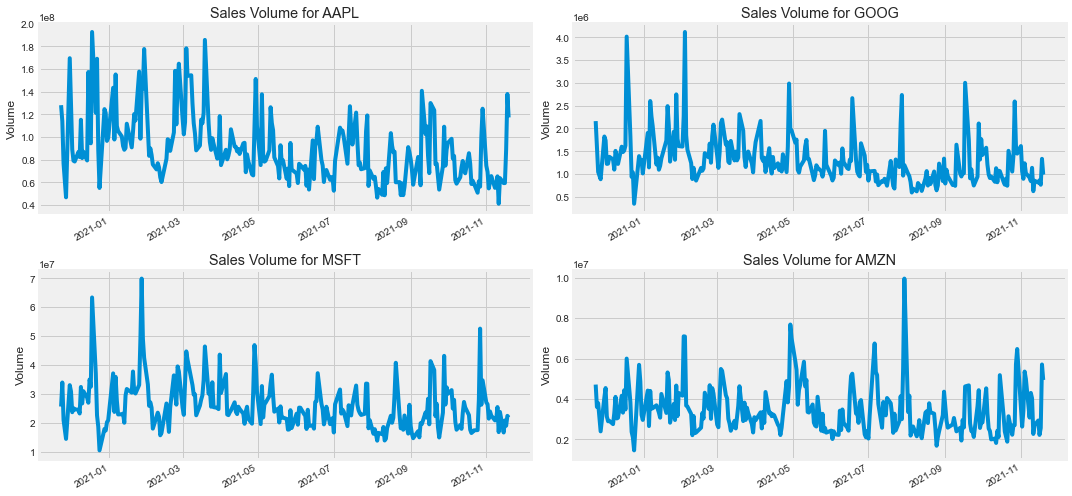

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [14]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [15]:
# print(GOOG.columns)

Now let's go ahead and plot all the additional Moving Averages

In [16]:
# df.groupby("company_name").hist(figsize=(12, 12));

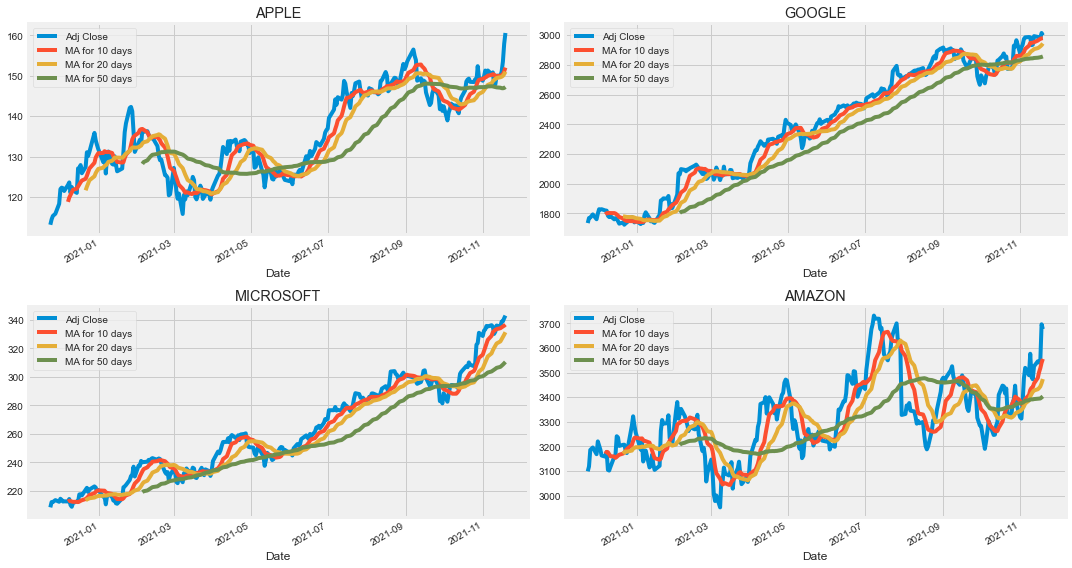

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

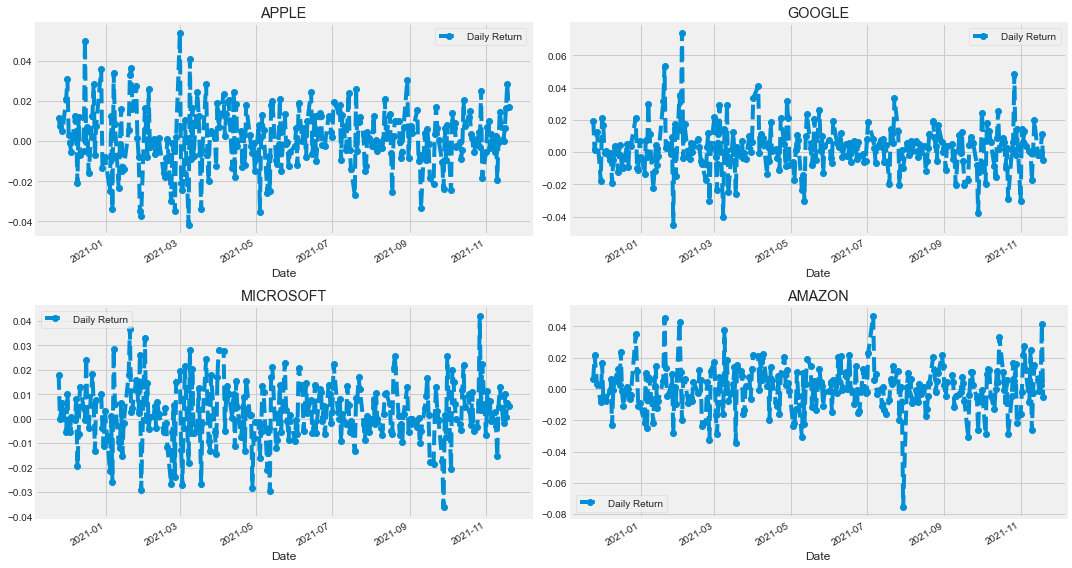

In [18]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\mohab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohab\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

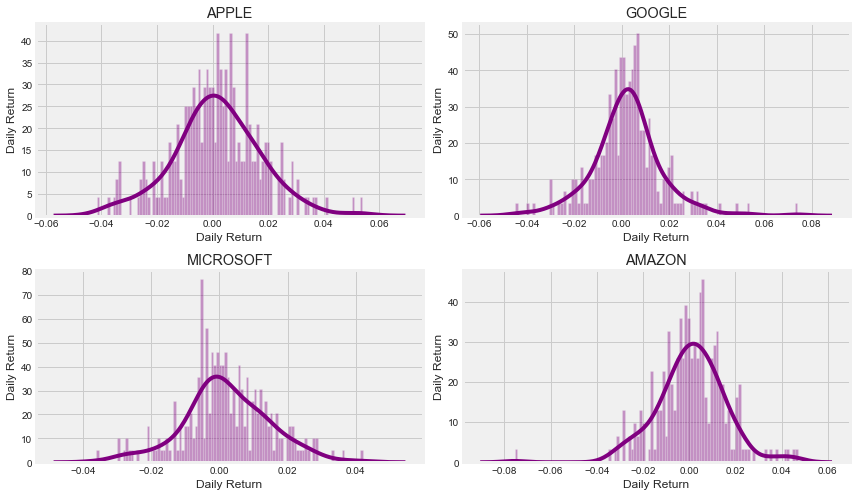

In [19]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [20]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-23,113.152435,1734.859985,208.363434,3098.389893
2020-11-24,114.464355,1768.880005,212.082245,3118.060059
2020-11-25,115.319084,1771.430054,212.092178,3185.070068
2020-11-27,115.875641,1793.189941,213.440872,3195.340088
2020-11-30,118.320580,1760.739990,212.290527,3168.040039


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [21]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-23,NaN,NaN,NaN,NaN
2020-11-24,0.011594,0.019610,0.017848,0.006349
2020-11-25,0.007467,0.001442,0.000047,0.021491
2020-11-27,0.004826,0.012284,0.006359,0.003224
2020-11-30,0.021100,-0.018096,-0.005390,-0.008544


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

C:\Users\mohab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


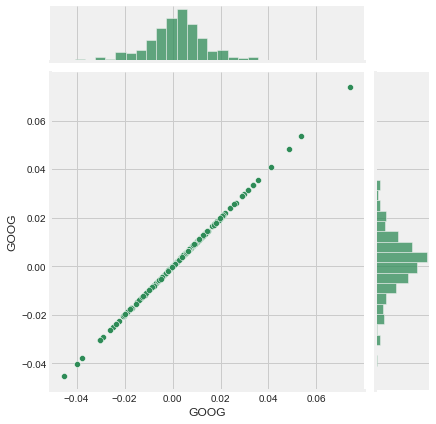

In [22]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

C:\Users\mohab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


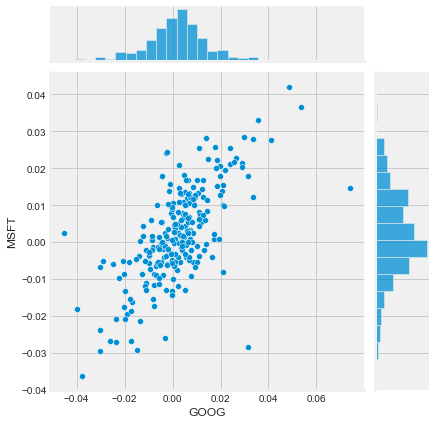

In [23]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

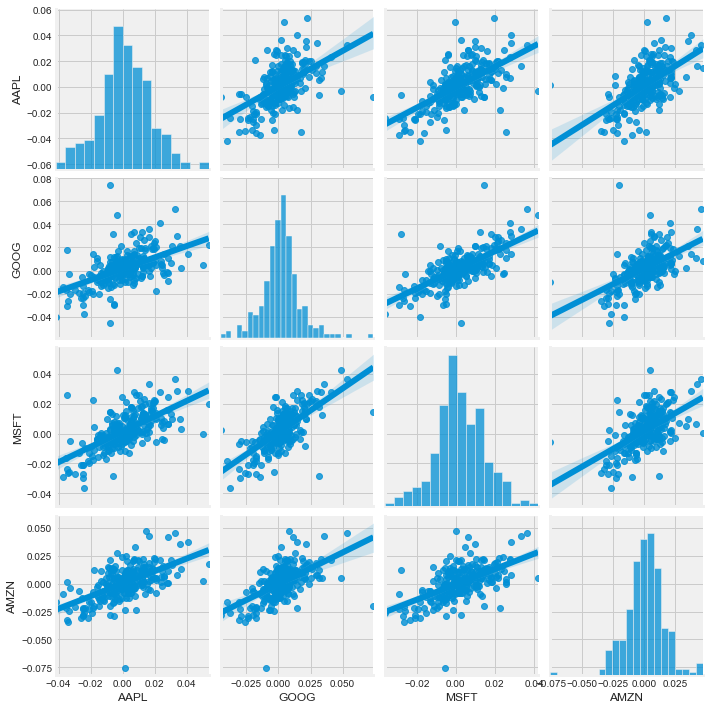

In [24]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

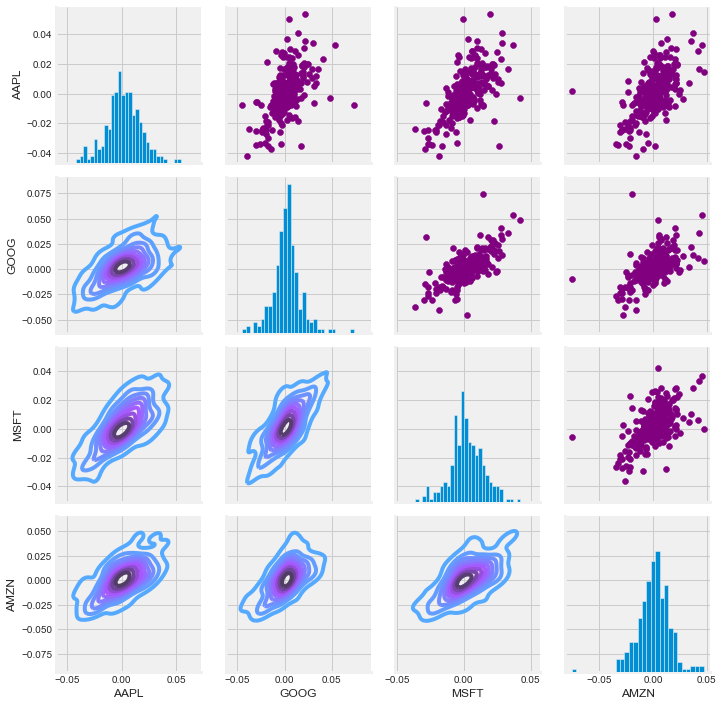

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

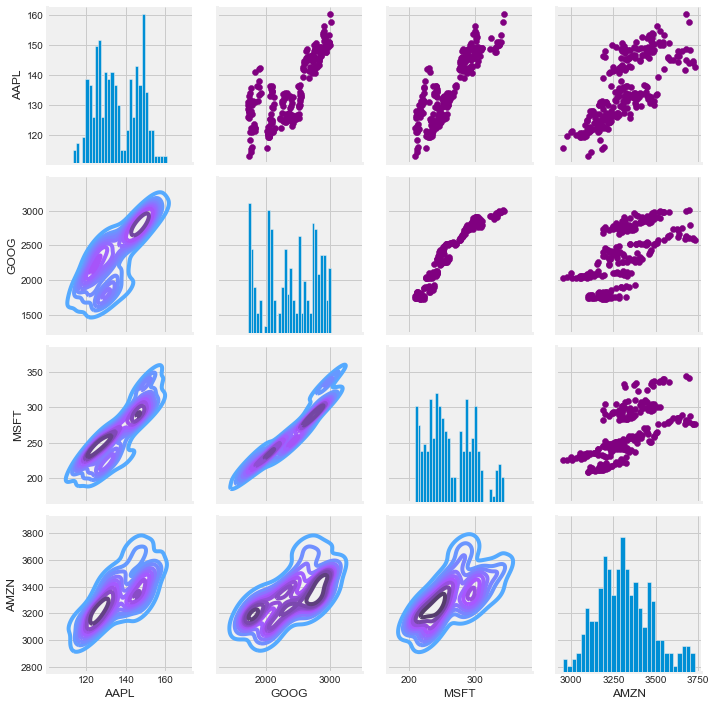

In [26]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

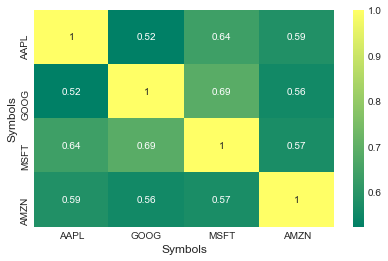

In [27]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

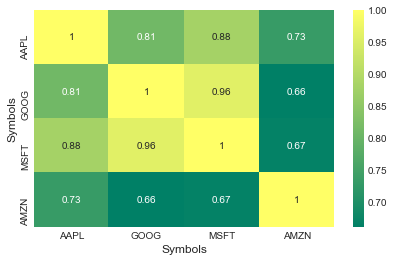

In [28]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

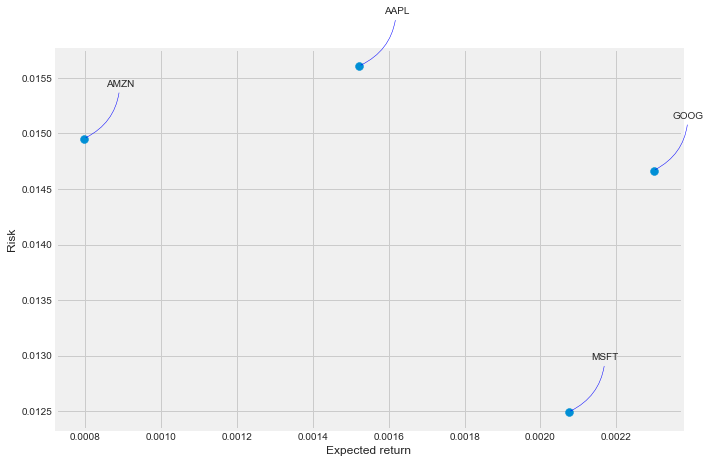

In [29]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [30]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591939
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659609
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800152
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933965
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913449
...,...,...,...,...,...,...
2021-11-15,151.880005,149.429993,150.369995,150.000000,59222800.0,150.000000
2021-11-16,151.490005,149.339996,149.940002,151.000000,59256200.0,151.000000
2021-11-17,155.000000,150.990005,151.000000,153.490005,88807000.0,153.490005


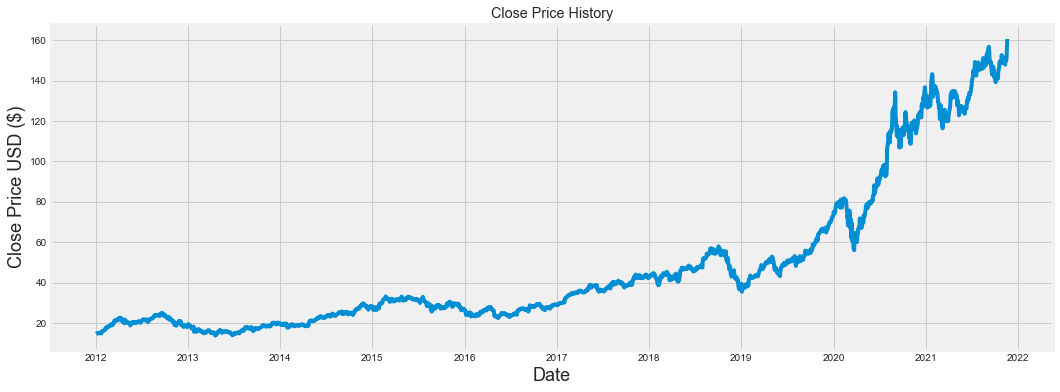

In [31]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [32]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2365

In [33]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00504279],
       [0.00558117],
       [0.00669936],
       ...,
       [0.95184259],
       [0.98171922],
       [1.        ]])

In [34]:
scaled_data.shape

(2489, 1)

In [35]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00504279, 0.00558117, 0.00669936, 0.00776395, 0.00760073,
       0.00796858, 0.00780049, 0.0075179 , 0.00713298, 0.00832426,
       0.00939859, 0.00906728, 0.00725235, 0.00898445, 0.00727916,
       0.013674  , 0.01317947, 0.01382504, 0.01522094, 0.01606628,
       0.01599563, 0.01573497, 0.01684584, 0.01789094, 0.0190749 ,
       0.02098727, 0.02500445, 0.02506535, 0.02730172, 0.0289729 ,
       0.02610071, 0.02720671, 0.02718478, 0.03028598, 0.02984503,
       0.03066113, 0.03212769, 0.0329438 , 0.03529466, 0.03700725,
       0.03750179, 0.03767476, 0.03474654, 0.03404005, 0.03414481,
       0.03689764, 0.03767233, 0.03933621, 0.04325837, 0.04849118,
       0.04751185, 0.04751429, 0.0512976 , 0.05248157, 0.05163866,
       0.05086885, 0.05006736, 0.05273004, 0.05455715, 0.05532209])]
[0.053431651270076694]

[array([0.00504279, 0.00558117, 0.00669936, 0.00776395, 0.00760073,
       0.00796858, 0.00780049, 0.0075179 , 0.00713298, 0.00832426,
       0.00939859, 0.00906728, 0.0

In [36]:
print(scaled_data.shape)

(2489, 1)


In [37]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [38]:
print(x_train.shape, y_train.shape)

(2305, 60, 1) (2305,)


In [39]:
print(x_test.shape, y_test.shape)

(124, 60, 1) (124, 1)


In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [45]:
class Model(object):
    def __init__(self, x_train, y_train, hidden_state_dim=[128,64], dens_dim=[25,1],
    optimizer='adam', loss='mean_squared_error', metrics=['acc']):
        self.X = x_train
        self.Y = y_train
        #
        input_shape=(self.X.shape[1], 1)
        # Build the LSTM model
        self.model = Sequential()
        self.model.add(LSTM(hidden_state_dim[0], return_sequences=True, input_shape=input_shape))
        self.model.add(LSTM(hidden_state_dim[1], return_sequences=False))
        self.model.add(Dense(dens_dim[0]))
        self.model.add(Dense(dens_dim[1]))
        # Compile the model
        self.model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
        
    def fit(self, batch_size, epochs, validation_data):
        self.model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=validation_data)

In [46]:
model = Model(x_train, y_train)
# Train the model
model.fit(batch_size=1, epochs=1, validation_data=(x_test, y_test))


2305/2305 [==============================] - 63s 10ms/step - loss: 0.0011 - acc: 4.3384e-04 - val_loss: 20571.4316 - val_acc: 0.0000e+00


In [ ]:
#scaled_data[]

numpy.ndarray

In [47]:
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

In [75]:
def acc(trials=10):
    accs = []
    for i in range(trials):
        print('simulation %d'%(i + 1))
        # Get the models predicted price values 
        predictions = model.model.predict(x_test)
        predictions = scaler.inverse_transform(predictions)
        accs.append(predictions)
    return accs
accs = acc()
accuracies = [calculate_accuracy(y_test, r) for r in accs ]
print('average accuracy: %.4f'%(np.mean(accuracies)))

simulation 1
simulation 2
simulation 3
simulation 4
simulation 5
simulation 6
simulation 7
simulation 8
simulation 9
simulation 10
average accuracy: 95.0248


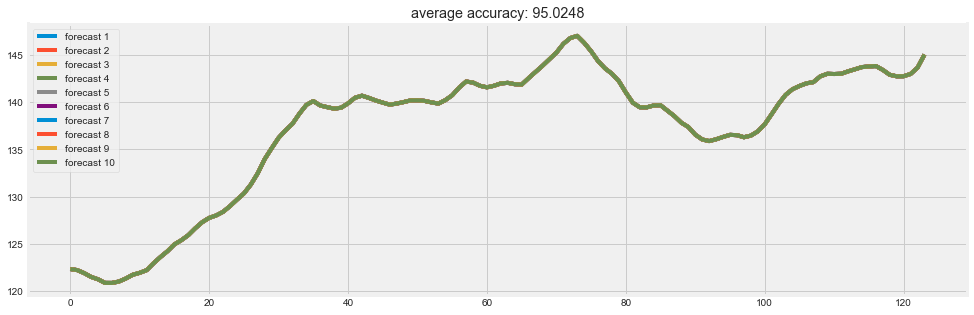

In [77]:
plt.figure(figsize = (15, 5))
for no, r in enumerate(accs):
    plt.plot(r, label = 'forecast %d'%(no + 1))
#plt.plot(x_test, label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))
plt.show()

In [50]:
print(x_test.shape)

(124, 60, 1)


In [52]:
# Get the models predicted price values 
predictions = model.model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.327508805518626

In [ ]:
print(predictions.shape)

(123, 1)


In [ ]:
print(data.shape)

(2467, 1)


In [ ]:
print(lim)

1828


In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]


In [ ]:
print(2457-lim)

629


In [ ]:
print(valid.shape)

(123, 1)


In [ ]:
print(train.shape)

(2344, 1)


In [ ]:
valid

,Close
Date,
2021-04-28,133.580002
2021-04-29,133.479996
2021-04-30,131.460007
2021-05-03,132.539993
2021-05-04,127.849998
...,...
2021-10-14,143.759995
2021-10-15,144.839996
2021-10-18,146.550003


In [ ]:
valid['Predictions'] = predictions


<ipython-input-158-051906f0b5db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


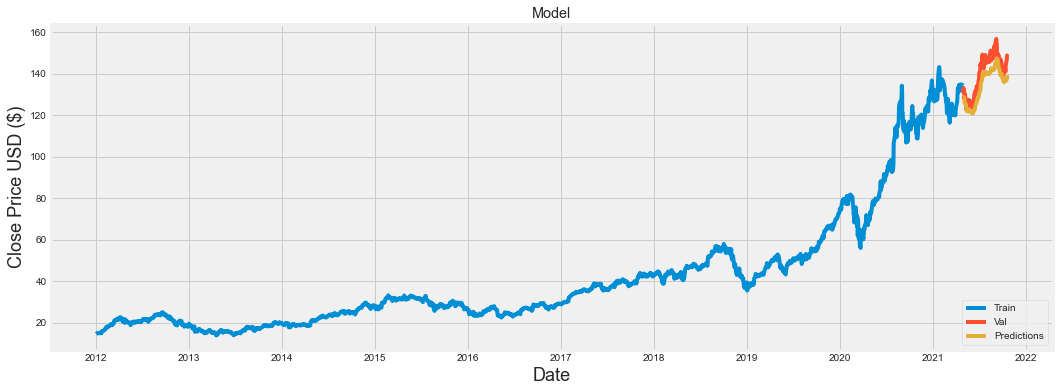

In [ ]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid